# Assignment 1
### *Johan Öhman*
---
Full assignment instructions are available [here](https://docs.google.com/document/d/1PhdT8Ymyej4goiQLgcOAz-VWngbF8oNIxWVTMkwXnOc/edit#)


**I present all of my work in this jupyter notebook below**

First import the necessary liberies 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


## Task A

## 1. Discrete random variables:


---
**a)** *Recreate Figure 4.1 in the book by creating a function that simulates coin tosses from a fair coin.  
Hint: Let 0 and 1 represent tail and head, respectively. Sample uniformly distributed vector of size n. (use rand(n) in matlab, python, julia). Then check if the values are below  then assign 1 otherwise 0.*

---

Sample data from Bernulli with p = 0.5. Use the cumalative sum to get the total number of heads. To get the proportion of heads
divide with the running number of samples.

Text(0,0.5,'Proportion Heads')

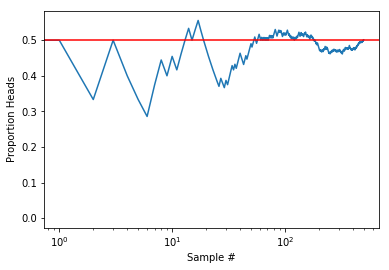

In [3]:
n,p = 500,0.5
data = np.random.binomial(1,p,n-1)
sample = np.arange(1,500)
data = np.cumsum(data)
plt.figure()
plt.semilogx(data/sample)
plt.axhline(y=0.5,c='red')
plt.xlabel("Sample #")
plt.ylabel("Proportion Heads")

**The result shows that the mean converges towards** $p = 0.5$

---
**b)** *Modify the function so that the coin is biased with  proportion of heads.*

---
Repeat **a)** but sample from bernulli with p = 0.25

Text(0,0.5,'Proportion Heads')

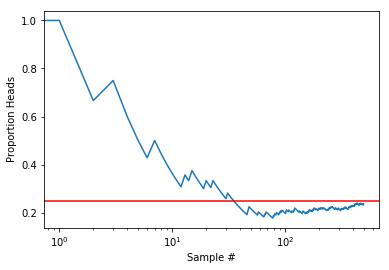

In [4]:
# b)
n,p = 500,0.25
data = np.random.binomial(1,p,n-1)
sample = np.arange(1,n)
data = np.cumsum(data)
plt.figure()
plt.semilogx(data/sample)
plt.axhline(y=0.25,c='red')
plt.xlabel("Sample #")
plt.ylabel("Proportion Heads")

**The proportion of heads converges towards the theoretical value of** $p=0.25$

---
**c)** *Sample n=100 tosses with the biased coin. Plot a histogram with relative frequencies of the tosses and the true probability mass function (PMF) in the same figure. Compare these figures.*
* *What will happen when n grows?*  
* *Try different values of n.*



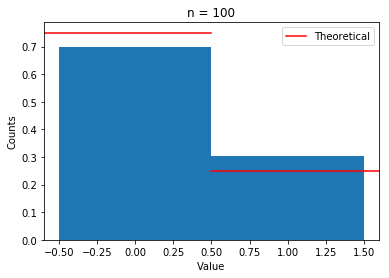

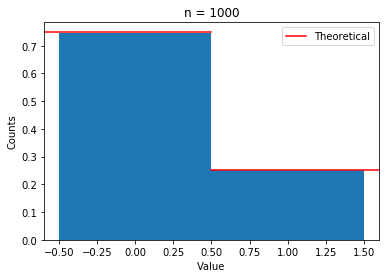

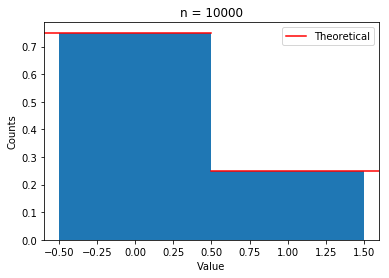

In [5]:
#Define a function that generates the data and plots the histogram
def plot_hist(n,p):
    data = np.random.binomial(1,p,n-1)

    plt.figure()
    plt.hist(data,bins = [-0.5,0.5,1.5],density=True)
    plt.xlabel("Value")
    plt.ylabel("Counts")
    plt.axhline(y = 0.75,xmin = -0.5,xmax = 0.5,c = 'r')
    plt.axhline(y = 0.25,xmin = 0.5,xmax = 1.5,c = 'r')
    plt.title("n = "+ str(n))
    plt.legend(['Theoretical'])

#Generate the different histograms!    
n,p = 100,0.25
plot_hist(n,p)

#Increase number of samples
n,acorrp = 1000,0.25
plot_hist(n,p)

#Further increase number of samples
n,p = 10000,0.25
plot_hist(n,p)

When n grows the sampled frequencies converge to the theoretical values

---
## 2. Continuous random variables: 							

  

---
**a)** *Draw  normally distributed numbers, with mode=mean=3.4 and variance=3 (i.e. , ). Plot a histogram with normalized frequencies and bin size of 0.1 together with the probability density function (PDF) in the same figure. You have to create your own PDF function in your language. (Hint: see python code in Figure 1 above.) Do they match?*

---
Samples are drawn from the N($\mu = 3.4, \sigma^2=3$) using the *numpy.random.normal* function and the theoretical distribution is generated by the defined *normal_dist* function.

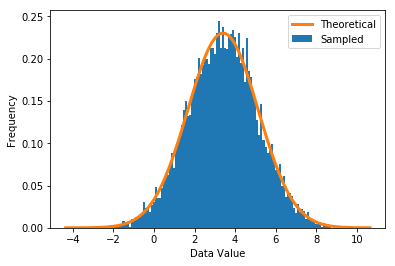

In [6]:
# pdf of normal distribution
def normal_dist(x,mu,sigma):
    y = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*(x-mu)**2/sigma**2)
    return y

#Sample from the normal distribution
m = 3.4
sig = np.sqrt(3)
n = 10000
sampled_data = np.random.normal(m,sig,n)

#Plot the histogram and the pdf
plt.figure()
binwidth = 0.1
hist_data,bins,patch = plt.hist(sampled_data, bins=np.arange(min(sampled_data), max(sampled_data) + binwidth, binwidth),density = True)
plt.plot(bins,normal_dist(bins,m,sig),linewidth=3)
plt.xlabel("Data Value")
plt.ylabel("Frequency")
plt.legend(['Theoretical','Sampled'])

The histogram of samples follow the theoretical distribution well.

---
**b)** *Calculate, using the PDF above and a Riemann sum to numerically integrate, the expected value using the definition of expectation in Eq. (4.6) page 85. Compare against the sample mean value of the  draws and against the true . Do they match?*

---

**c)** *Calculate, using the PDF above and a Riemann sum to numerically integrate, the variance value using the definition of expectation in Eq. (4.8) page 86. Compare against the sample variance of the  draws. Do they match?
The expected value of the mean and variance is calculated using the bin data from the histogram and the data*

---
The expected value is calculated using the bin vertices returned from the histogram in part **(a)**


In [7]:
dx = 0.1
E_mu = np.sum(hist_data*(bins[1:]-0.05)*dx) #Take the center of the bin,not the edges!

print("Mean value: \n" + str(E_mu) + "\n")

E_sig = np.sum(hist_data*(bins[1:]-0.05 - E_mu)**2*dx) #Take the center of the bin,not the edges!

print("Variance value: \n" + str(E_sig))

Mean value: 
3.4047909140898454

Variance value: 
3.0220942203999894


The values are close to the theoretical ones of $\mu = 3.4$ and $\sigma^2 = 3$

---
**d)** Let’s skew things up a bit. Let  denote a vector with $x$~N(0,1).  

* Let $y = log(x)$ then  is log-normally distributed.

* Plot histogram with normalized frequencies and bin size of 0.1 and the probability density function (PDF) in the same figure. Do they match?

* Find the mode using the samples:

    * Create a new vector , where  is the PDF of the log-normal distribution.
    * Find the index  (element number) that has the largest . 
    * An estimate of the mode is simply  (i.e. the sample  that returns the maximum density value )
* Find the mode of the PDF using optimization tools.
    * In python you can use the optimization function fmin in scipy.optimization. Just type from scipy.optimize import fmin in the beginning of your script to access it and use it. 

*Hint: Remember fmin and fminsearch will minimize any function so to maximize the PDF you can simply create a new function that returns the negative PDF, and minimize  with respect to.*

---

The variable x is $N(0,1)$, y is calculated as $\exp(x)$.  

The mode is calculated from the samples by finding the y value that gives the highest probibility.  

When using the optimizer the fmin function finds the mode from the theoretical pdf.

Sampled Mode = 0.36793
Optimization terminated successfully.
         Current function value: -0.657745
         Iterations: 21
         Function evaluations: 42
Mode = 0.36790


C:\Users\johohm-local\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\johohm-local\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:571: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\Users\johohm-local\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:582: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\Users\johohm-local\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:587: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:
C:\Users\johohm-local\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:575: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


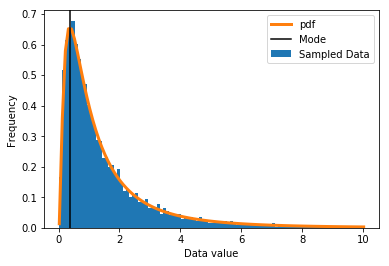

In [17]:
def lognormal_dist(x,mu,sigma):
    y = 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/2/sigma**2)
    return y

def min_lognormal_dist(x):
    y = lognormal_dist(x,mu=0,sigma=1)
    return -y



n = 10000
binwidth = 0.1
x = np.random.normal(0,1,n)
y = np.exp(x)   #Generate the log-normal distribution.
z = lognormal_dist(y,0,1)

#plt.figure()
#plt.plot(y,z,'bo')
res = np.where(z ==  np.amax(z))
print("Sampled Mode = %.5f" %y[res[0]])


plt.figure()
hist_data,bins,patch = plt.hist(y, bins=np.arange(min(y), 10 + binwidth, binwidth),density = True)

plt.plot(bins,(lognormal_dist(bins,0,1)),linewidth=3)


# Run the optimizer

minimum = opt.fmin(min_lognormal_dist,6)
print("Mode = %.5f" %minimum)
plt.axvline(x=minimum,c="k")
plt.xlabel("Data value")
plt.ylabel("Frequency")
plt.legend(["pdf","Mode","Sampled Data"])

Optimizer seams to find the correct value of the mode, since it converges on the same value as the mode from the samples. 

## Task B

I decided to use the pandas package to read the csv file and handle the data.  

---

**(1)** *Create a function that reads the content of this CSV file and returns a 4x4 matrix or array where the rows represent Eye color and columns Hair color, as depicted in Table 4.1 (page 90). 
Download the file.
The arguments into the function is a string containing the path and the filename ‘HairEyeColor.csv’.
The function shall read the content of the file. To do this you can either:
Use a build in csv reader (quick but you will learn less).
Or, preferable, create your own (learn more and useful later) by:
Reading all the lines in the file.
For each line parse out the information and put it into the matrix. 
Return the 4x4 matrix or array and print it to the console (command window or REPL).*


In [9]:
# Define the read csv file
def r_csv(filename):
    import pandas as pd
    dataframe = pd.read_csv(filename)
    return dataframe.pivot(index = "Eye",columns="Hair", values="Count")
# Read the csv!

name = "HairEyeColor.csv"
df = r_csv(name)

#### **(2)** *Use the function above and store the matrix in a variable.*  
**a)** *Take the sum over the columns and print the vector.*  
**b)** *Take the sum over the rows and print the vector.*  
**c)** *Take the sum over all elements and print the scalar.*  


In [10]:
#Sum over rows 
hairs = df.sum(axis = 0)
#Sum over columns
eyes = df.sum(axis = 1)
#Sum all elements
alla = df.values.sum()
print(df)
print("\n")
print(hairs)
print("\n")
print(eyes)
print("\n")
print("Sum of all: \n" + str(alla) )

Hair   Black  Blond  Brown  Red
Eye                            
Blue      20     94     84   17
Brown     68      7    119   26
Green      5     16     29   14
Hazel     15     10     54   14


Hair
Black    108
Blond    127
Brown    286
Red       71
dtype: int64


Eye
Blue     215
Brown    220
Green     64
Hazel     93
dtype: int64


Sum of all: 
592


To find the 

**(3)** Let us continue with this matrix above. Answer the following questions:    
* What is the probability that a person (in this particular study) has blue eyes and blond hair, i.e. what is ?
* What is the probability that a person has brown eyes, i.e. ?
* Given that a person has brown eyes, what is the probability that hair color is red, i.e. ?
* What is the probability that a person’s hair color is (red OR blond) AND eye color is (Brown OR blue), i.e ?
* What is the probability that a person’s hair color is (red OR blond) OR eye color is (Brown OR blue), i.e. ?
* Show that the attributes are dependent. The word AND is interpreted as the intersection of two events and denoted with  and OR is interpreted and the union of two events denoted . 

In [11]:
#a)
print("P(Blond AND Blue) = %.3f" %(df.Blond.Blue/alla))
#b)
print("P(Brown) = %.3f" %(eyes.Brown/alla))
#c)
print("P(Red|Brown) = %.3f" %(df.Red.Brown/eyes.Brown))
#d)
print("P((Red OR Blond) AND (Blue OR Brown))  = %.3f" % ((df.Red.Brown + df.Red.Blue + df.Blond.Brown + df.Blond.Blue)/alla))
#e)
print("P((Red OR Blond) OR (Blue OR Brown))  = %.3f" %((hairs.Red + hairs.Blond + eyes.Blue + eyes.Brown - df.Red.Blue - df.Red.Brown - df.Blond.Blue - df.Blond.Brown)/alla))



P(Blond AND Blue) = 0.159
P(Brown) = 0.372
P(Red|Brown) = 0.118
P((Red OR Blond) AND (Blue OR Brown))  = 0.243
P((Red OR Blond) OR (Blue OR Brown))  = 0.826


For independence of two events *a* and *b* it is required that **P(a AND b) = P(a)P(b)**

In [12]:
#P(red AND Hazel)
print("P(red AND Hazel) = %.3f" %(df.Red.Hazel/alla))

#P(red)P(Hazel)
print("P(red)P(Hazel)   = %.3f" %((hairs.Red + eyes.Hazel)/alla))



P(red AND Hazel) = 0.024
P(red)P(Hazel)   = 0.277


**Since the probabilities are not the same the events are dependent! And since all events needs to be independent for hair and eye colors to be independent it is no need to check the other classes.**